C:\Users\sharanu malipatil\AppData\Local\Temp\ipykernel_9532\1180614646.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Sales Summary:
   product  total_qty  revenue
0   Apples       14.0     35.0
1  Bananas       12.0     18.0
2  Oranges       10.0     30.0
3   Grapes        6.0     24.0


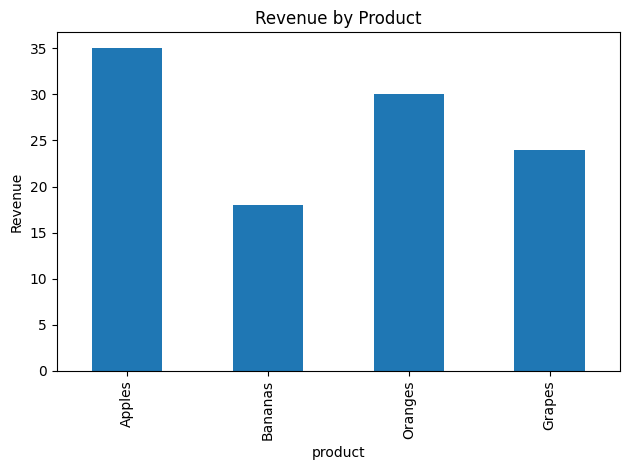

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sharanu@123",
    database="sales_db"
)
cursor = conn.cursor()

cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INT AUTO_INCREMENT PRIMARY KEY,
        product VARCHAR(255),
        quantity INT,
        price FLOAT
    )
""")

cursor.execute("DELETE FROM sales")

sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 5, 1.5),
    ('Oranges', 8, 3.0),
    ('Apples', 4, 2.5),
    ('Bananas', 7, 1.5),
    ('Oranges', 2, 3.0),
    ('Grapes', 6, 4.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (%s, %s, %s)", sample_data)
conn.commit()

query = """
SELECT product, 
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql(query, conn)

print("Sales Summary:")
print(df)

df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

cursor.close()
conn.close()
